**Group 2:**
- Taylor Bonar
- Robert Burigo
- Rashmi Patel
- Scott Englerth

# Rubric

## Business Understanding

**Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?**

# TBD

#### What is the purpose of the dataset and how was it collected? 

This data was originally collected from Spotify for analyzing behaviors between valence and other measures. Each provided track information is derived from Spotify's public api. There is a total of 232,725 tacks spanning 26 genres.

The dataset is a scraping of Spotify's tracks that detail a variety of fields such as:

* danceability
* energy
* key
* loudness
* mode
* speechiness
* acousticness
* instrumentalness
* liveness
* valence
* tempo
* type
* track_id
* artist_name
* popularity
* track_name
* genre
* duration in milliseconds


#### How would you measure effectiveness of a good algorithm? 

From a technical perspective, we would measure the effectiveness of a clustering model by creating clusters that have a minimal distance within the cluster and are greater distance between different clusters. From a stakeholder perspective, we could measure the effectiveness of good clusters in two ways. Pre-deployment we would have to rely on subject-matter (music) experts that could sample from clusters and flag obvious misfits. After deployment we would measure effectiveness by collecting user feedback such as likes/dislikes, duration played, and song skips. The after deployment user feedback data would likely be our main way of measuring success, improving our model, and adjusting our clusters/playlists.

#### Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?

Using user feedback as our validation method makes sense for our model since the end goal of this cluster model is to increase user time spent in the app and user satisfaction with the app. The product team will likely be happy with our clusters if they see playlists being used frequently and if they see that users that use playlist spend more time in the app and are happy with the songs our playlists suggest for them.

## Data Understanding
**Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.** 

In [138]:
import os

import pandas as pd  # working w/ data frames

In [139]:
file_path = os.path.join(os.getcwd(), "SpotifyFeatures.csv")

#Loading in csv Spotify dataset
df = pd.read_csv(file_path)  # read in the csv file

# Data Import Check
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


**Categorical Variables:**
* **genre** - describes the genre category of the track
* **artist_name** - describes the name of the artist
* **track_name** - describes the name of the track
* **track_id** - unique track identifier
* **key** - describes the key/pitch the track is in
* **mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* **time_signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**Continous Variables:**
* **popularity** - (0-100, least popular to most popular) The popularity of the track. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
* **acousticness** - (0.0-1.0) A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* **danceability** - (0.0-1.0) Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* **duration_ms** - The duration of the track in milliseconds.
* **energy** - (0.0-1.0) Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* **instrumentalness** - (0.0-1.0) Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* **liveness** - (0.0-1.0) Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **loudness** - (-60 to 0 decibels/dB typically) The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* **speechiness** - (0.0-1.0) Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* **tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* **valence** - (0.0-1.0) Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [140]:
df.info() # There are 232725 number of rows and 18 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

Our initial import of our data shows that most of our objects are imported as objects, int64, and float64. We may need to transition some of these variables, such as key, mode, etc., to one-hot encoding via sklearn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)/[One-Hot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) or convert to a dtype of [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) into our pandas dataframe. 

However, if you examine the current [Spotify Web API for retrieving tracks' audio features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features), you will notice our data does not entirely match what is expected. For clarity, please refer to the section above for expected ranges of continuous variables.

Next, we will inspect and look closer at our categorical variables, genre, key, mode, and time signature, to check for any potential data input mistakes.

In [141]:
print(f'''Unique Values for Categorical Variables
Genres: {df.genre.unique()}
Keys: {df.key.unique()}
Modes: {df["mode"].unique().tolist()}
Time Signatures: {df['time_signature'].unique().tolist()}''')

Unique Values for Categorical Variables
Genres: ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']
Keys: ['C#' 'F#' 'C' 'F' 'G' 'E' 'D#' 'G#' 'D' 'A#' 'A' 'B']
Modes: ['Major', 'Minor']
Time Signatures: ['4/4', '5/4', '3/4', '1/4', '0/4']


Here, we can see an immediate problem. In genres, we have a Children's Music twice, as it appears one of them has a smart quote. This should be an easy fix thanks to pandas' dataframe.loc method.

In [142]:
df.loc[df['genre'] == 'Children’s Music', ['genre']] = "Children's Music"
print(f"New Unique Values for Genre: {df.genre.unique()}")

New Unique Values for Genre: ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music" 'Rap' 'Indie'
 'Classical' 'Pop' 'Reggae' 'Reggaeton' 'Jazz' 'Rock' 'Ska' 'Comedy'
 'Soul' 'Soundtrack' 'World']


In [143]:
df.describe() # shows statistics of spotify data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


# TODO

#### Data Quality

In [144]:
print(f'''Are there missing values? {df.isnull().values.any()}
How many values are missing? {df.isnull().values.sum()} values''')

Are there missing values? False
How many values are missing? 0 values



**Duplicate data?**

Upon an initial inspection with pandas dataframe, one would think there are no duplicates in this dataset. However, as we've previously explored this dataset in Lab 2 for Classification, we discovered there are two duplicacy problem: genre and popularity.

**Multi-Genre & Popularity Duplicacy Exploration**

The Kaggle dataset was initially utilizing two Spotify Web API endpoints ([Search](https://developer.spotify.com/documentation/web-api/reference/#/operations/search) & [Get Tracks' Audio Features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)) and then joins them into Google Cloud Platform's Big Query. As the [original code](https://github.com/tgel0/spotify-data) limited the tracks to 1000 per search query of songs with year 2021. The original Kaggle author did not specify how they scrapped the code, but it can be observed, once dropping the "genre" variable.

In [145]:
print(df[df.duplicated(keep=False)])

Empty DataFrame
Columns: [genre, artist_name, track_name, track_id, popularity, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence]
Index: []


In [146]:
duplicated_all = df[df.duplicated(subset = 'track_id', keep=False)]
duplicated = df[df.duplicated(subset = 'track_id', keep='first')]
df[df['track_id'] == duplicated['track_id'].iloc[1]] # Because I wanted to show Frank Ocean

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
142,R&B,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.975,0.377,334570,0.255,0.000208,E,0.102,-11.165,Minor,0.0387,125.004,5/4,0.37
1385,Alternative,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,61,0.975,0.377,334570,0.255,0.000208,E,0.102,-11.165,Minor,0.0387,125.004,5/4,0.37
68573,Hip-Hop,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.975,0.377,334570,0.255,0.000208,E,0.102,-11.165,Minor,0.0387,125.004,5/4,0.37
77577,Children's Music,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.975,0.377,334570,0.255,0.000208,E,0.102,-11.165,Minor,0.0387,125.004,5/4,0.37
192149,Soul,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.975,0.377,334570,0.255,0.000208,E,0.102,-11.165,Minor,0.0387,125.004,5/4,0.37


In [147]:
og_duplicates_shape = duplicated.shape[0]
og_total_dupes = duplicated_all.shape[0]
og_total_df_records = df.shape[0]
og_dupe_percentage = round(duplicated_all.shape[0]/df.shape[0]*100, 2)

print(f'''Original Dataset's Unique Duplicates: {og_duplicates_shape} duplicates
Original Dataset's Total Duplicates Rows: {og_total_dupes} rows
Original Dataset's Total Data Rows: {og_total_df_records} rows
Original Dataset's Duplicates Percentage: {og_dupe_percentage} %''')

Original Dataset's Unique Duplicates: 55951 duplicates
Original Dataset's Total Duplicates Rows: 91075 rows
Original Dataset's Total Data Rows: 232725 rows
Original Dataset's Duplicates Percentage: 39.13 %


We have a large portion of our dataset that are duplicate songs but marked as different genres with similar audio features, but also occasional different popularity ratings. We'll use sklearn's One Hot Encoder to reduce and handle the multi-genre problem, and we'll either take an average (i.e., the mean) or the most common, repeated value (mode) to handle the popularity problem

In [148]:
from sklearn import preprocessing

In [149]:
genre_multilabel_binarizer = preprocessing.MultiLabelBinarizer(sparse_output=True)
genre_multilabel_binarizer.fit([df.genre.unique()])
print(f"Genre Class Multi-Labels are: {genre_multilabel_binarizer.classes_}")

# Use group by to track unique songs, then using those grouped songs, create a tuple of genres
df_grouped_genre_songs = pd.DataFrame(df.groupby(['track_id','artist_name','track_name'])['genre'].apply(lambda x: tuple(x.values)))
df_grouped_genre_songs.reset_index(inplace=True)
df_grouped_genre_songs.tail()


Genre Class Multi-Labels are: ['A Capella' 'Alternative' 'Anime' 'Blues' "Children's Music" 'Classical'
 'Comedy' 'Country' 'Dance' 'Electronic' 'Folk' 'Hip-Hop' 'Indie' 'Jazz'
 'Movie' 'Opera' 'Pop' 'R&B' 'Rap' 'Reggae' 'Reggaeton' 'Rock' 'Ska'
 'Soul' 'Soundtrack' 'World']


,track_id,artist_name,track_name,genre
177044,7zz7MbCb9G7KJc1NVl9bL0,Caravan Palace,Maniac,"(Jazz,)"
177045,7zzFNNxVD0h0ctAT08H0pa,Thelonious Monk Quartet,Crepescule With Nellie - Live At Carnegie Hall...,"(Jazz,)"
177046,7zzTeItz93lYI52hlcipm5,Magnate Y Valentino,Una En Un Millón,"(Reggaeton,)"
177047,7zzZmpw8L66ZPjH1M6qmOs,Moonstar88,Migraine,"(Children's Music, Indie)"
177048,7zzbfi8fvHe6hm342GcNYl,Bob Weir,Black-Throated Wind,"(Blues,)"


In [150]:
df_genre_multilabel_binarized = df.join(
    pd.DataFrame.sparse.from_spmatrix(  # Create sparse array of songs to merge into dataframe
        genre_multilabel_binarizer.transform(df_grouped_genre_songs["genre"]),  # Creates array of a sparse matrix
        columns=genre_multilabel_binarizer.classes_,  # Sets columns into genre names instead of numbers
        index=df_grouped_genre_songs["track_id"]  # Creates index via track_id
    ),
    on="track_id"
)

df_genre_multilabel_binarized.tail()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,...,0,0,0,0,0,0,0,1,0,0
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,...,0,0,0,0,0,0,0,1,0,0
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,...,0,0,0,0,0,0,0,1,0,0
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,...,0,1,0,0,0,0,0,1,0,0
232724,Soul,Mint Condition,You Don't Have To Hurt No More,34XO9RwPMKjbvRry54QzWn,35,0.09730,0.758,323027,0.470,0.000049,...,0,0,0,0,0,0,0,1,0,0


Now that we have the multi-label binarizer done on the song tracks, let's re-examine our Frank Ocean song again to see how it matches up and if we can drop the old genre.

In [151]:
duplicated_all = df_genre_multilabel_binarized[df_genre_multilabel_binarized.duplicated(subset = 'track_id', keep=False)]
duplicated = df_genre_multilabel_binarized[df_genre_multilabel_binarized.duplicated(subset = 'track_id', keep='first')]
frank_ocean = df_genre_multilabel_binarized[df_genre_multilabel_binarized['track_id'] == duplicated['track_id'].iloc[9]]
frank_ocean

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
142,R&B,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.975,0.377,334570,0.255,0.000208,...,0,1,0,0,0,0,0,1,0,0
1385,Alternative,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,61,0.975,0.377,334570,0.255,0.000208,...,0,1,0,0,0,0,0,1,0,0
68573,Hip-Hop,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.975,0.377,334570,0.255,0.000208,...,0,1,0,0,0,0,0,1,0,0
77577,Children's Music,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.975,0.377,334570,0.255,0.000208,...,0,1,0,0,0,0,0,1,0,0
192149,Soul,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.975,0.377,334570,0.255,0.000208,...,0,1,0,0,0,0,0,1,0,0


In [152]:
df_audio_reg_feats = df_genre_multilabel_binarized.drop(columns=["genre"]).reset_index(drop=True)  # Remove single "genre" column in favor of multiple "one-hot enccodings" via Multilabel Binarizer
df_audio_reg_feats.drop_duplicates(subset=['artist_name','track_name','track_id', 'popularity'], keep='first',inplace=True)  # Note: add popularity to reduce condensing for future averaging of score

duplicated_all = df_audio_reg_feats[df_audio_reg_feats.duplicated(subset = 'track_id', keep=False)]  # list all duplicated songs subset by track_id
duplicated = df_audio_reg_feats[df_audio_reg_feats.duplicated(subset = 'track_id', keep='first')]  # now keep only the first track of duplicates for individual track_ids
df_audio_reg_feats[df_audio_reg_feats['track_id'] == duplicated['track_id'].iloc[0]]  # Extract matching duplicates only

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
142,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.975,0.377,334570,0.255,0.000208,E,...,0,1,0,0,0,0,0,1,0,0
1393,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,61,0.975,0.377,334570,0.255,0.000208,E,...,0,1,0,0,0,0,0,1,0,0


Now that we've reduced Seigfried by Frank Ocean to just two rows, we can now see that popularity is the only separation between the two rows. Let's go ahead and fix that by taking the average popularity score between the the duplicated rows.

In [153]:
avg_duplicates_popularity = df_audio_reg_feats.groupby("track_id")['popularity'].mean()
df_audio_reg_feats = df_audio_reg_feats.set_index('track_id')  # matches indexes of avg_duplicates_popularity
df_audio_reg_feats["popularity"] = avg_duplicates_popularity  # Write over old popularity with avg popularity
df_audio_reg_feats = df_audio_reg_feats.reset_index()  # resets to take off hierarchical index

df_audio_reg_feats[df_audio_reg_feats['track_id'] == duplicated['track_id'].iloc[0]]

,track_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
142,1BViPjTT585XAhkUUrkts0,Frank Ocean,Seigfried,63.5,0.975,0.377,334570,0.255,0.000208,E,...,0,1,0,0,0,0,0,1,0,0
1384,1BViPjTT585XAhkUUrkts0,Frank Ocean,Seigfried,63.5,0.975,0.377,334570,0.255,0.000208,E,...,0,1,0,0,0,0,0,1,0,0


In [154]:
df_audio_reg_feats.drop_duplicates(subset=['artist_name','track_name','track_id'], keep='first',inplace=True)

df_audio_reg_feats[df_audio_reg_feats['track_id'] == duplicated['track_id'].iloc[0]]

,track_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
142,1BViPjTT585XAhkUUrkts0,Frank Ocean,Seigfried,63.5,0.975,0.377,334570,0.255,0.000208,E,...,0,1,0,0,0,0,0,1,0,0


Now that we've taken the average popularity for the remaining duplicates and dropped all duplicate rows, let's see how our duplication is shaping up.

In [155]:
# Update duplicated variables with df_audio_reg_feats to see how it's shaping up.
duplicated_all = df_audio_reg_feats[df_audio_reg_feats.duplicated(subset = 'track_id', keep=False)]
duplicated = df_audio_reg_feats[df_audio_reg_feats.duplicated(subset = 'track_id', keep='first')]

new_duplicates_shape = duplicated.shape[0]
new_total_dupes = duplicated_all.shape[0]
new_total_df_records = df_audio_reg_feats.shape[0]
new_dupe_percentage = round(duplicated_all.shape[0]/df.shape[0]*100, 2)

print(f'''New Dataset's Unique Duplicates: {new_duplicates_shape} -- previously {og_duplicates_shape} duplicates
New Dataset's Total Duplicated Rows: {new_total_dupes} -- previously {og_total_dupes} rows
New Dataset's Total Data Rows: {new_total_df_records} -- previously {og_total_df_records} rows
New Dataset's Duplicates Percentage: {new_dupe_percentage} % -- previously {og_dupe_percentage} %''')

New Dataset's Unique Duplicates: 275 -- previously 55951 duplicates
New Dataset's Total Duplicated Rows: 550 -- previously 91075 rows
New Dataset's Total Data Rows: 177049 -- previously 232725 rows
New Dataset's Duplicates Percentage: 0.24 % -- previously 39.13 %


We have reduced from about 40% duplicates to now roughly 0.24% of duplicated data. That's a considerable improvement from the previous measure. We could look closer at spelling storage errors within track names and artist names, but we'll cut it off here as our rates are satisfactory.


**Outliers? Are those mistakes? How do you deal with these problems?**

For a change of pace, we will use pandas profiling library to examine closer at any potential outliers. Let's generate an exploration report on what new dataset


In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
numerical_columns = df_audio_reg_feats.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
genre_columns = df_audio_reg_feats[genre_multilabel_binarizer.classes_]

desired_boxplot_columns = numerical_columns.drop(axis=1, labels=genre_columns).drop(["duration_ms", "popularity", "loudness", "tempo"], axis=1)


In [225]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.5)

Text(0.5, 1.0, 'Audio Feature Scale')

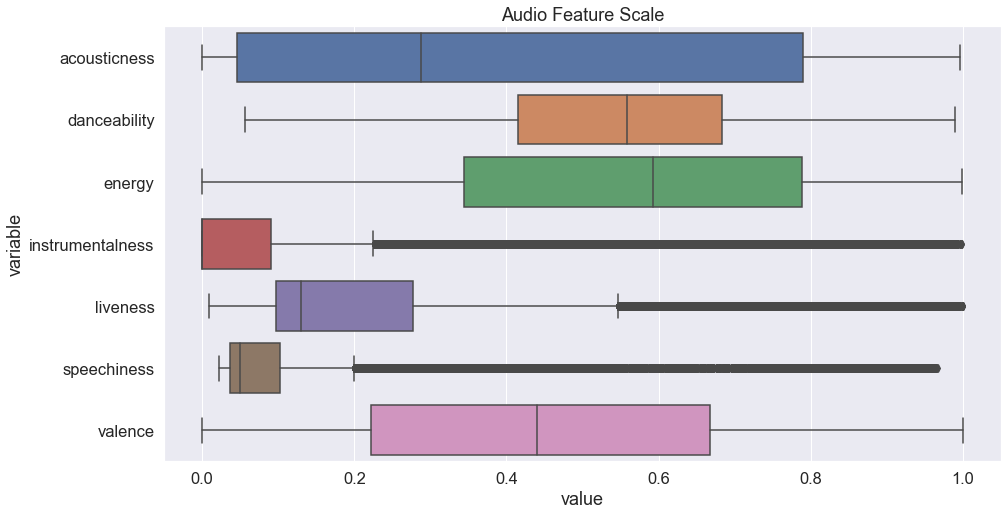

In [226]:
p = sns.boxplot(x="value", y="variable", data = pd.melt(desired_boxplot_columns))
p.set_title("Audio Feature Scale")

Text(0.5, 0, 'Popularity Value')

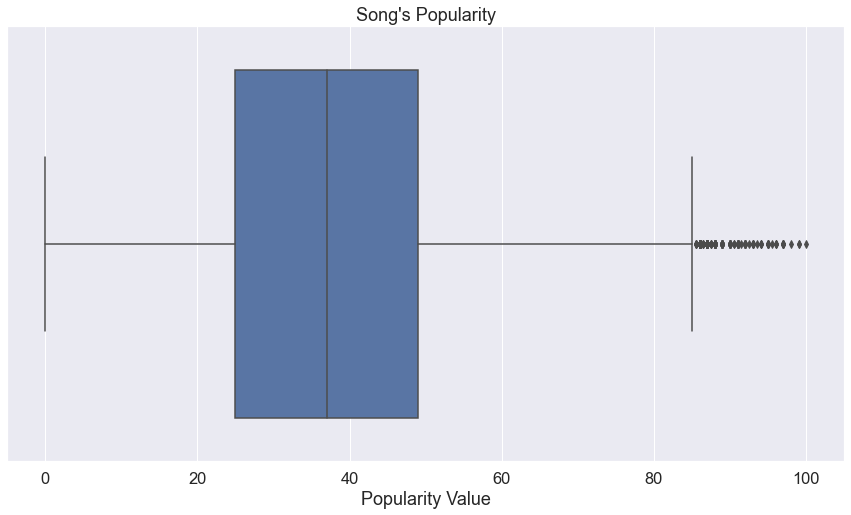

In [227]:
p = sns.boxplot(x="popularity", data=numerical_columns)
p.set_title("Song's Popularity")
p.set_xlabel("Popularity Value")

Text(0.5, 0, 'Duration (in milliseconds)')

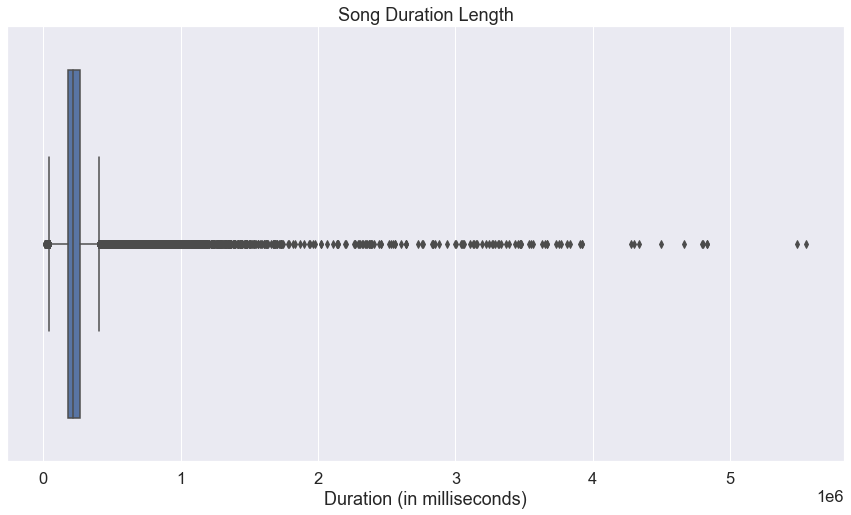

In [228]:
p = sns.boxplot(x="duration_ms", data=numerical_columns)
p.set_title("Song Duration Length")
p.set_xlabel("Duration (in milliseconds)")

Text(0.5, 0, 'BPM')

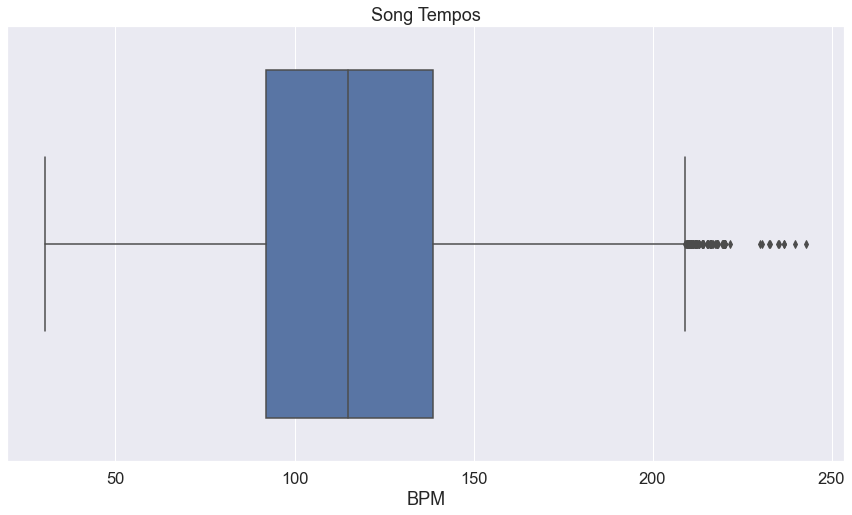

In [232]:
p = sns.boxplot(x="tempo", data=numerical_columns)
p.set_title("Song Tempos")
p.set_xlabel("BPM")

Text(0.5, 0, 'Decibels (dB)')

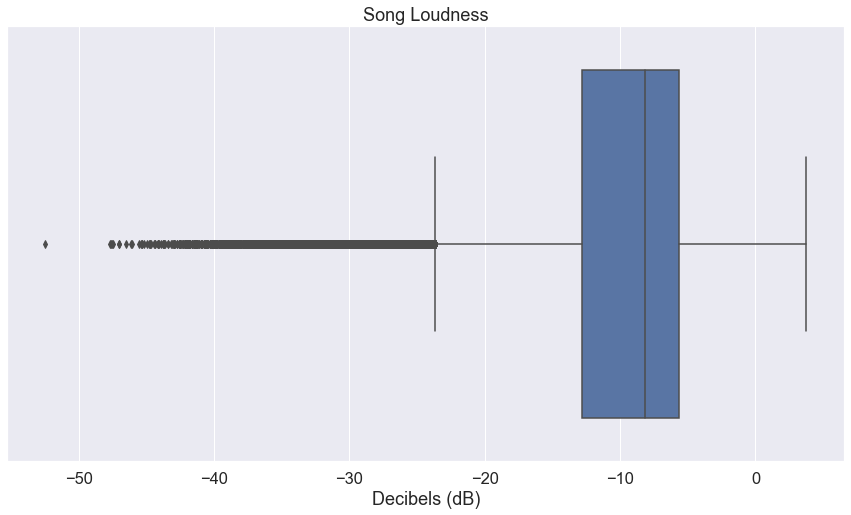

In [233]:
p = sns.boxplot(x="loudness", data=numerical_columns)
p.set_title("Song Loudness")
p.set_xlabel("Decibels (dB)")

**Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.**

## Modeling and Evaluation 
Different tasks will require different evaluation methods. Be as thorough as possible when analyzing
the data you have chosen and use visualizations of the results to explain the performance and
expected outcomes whenever possible. Guide the reader through your analysis with plenty of
discussion of the results
* **Option A: Cluster Analysis:**
  * Perform cluster analysis using several clustering methods
  * How did you determine a suitable number of clusters for each method?
  * Use internal and/or external validation measures to describe and compare the clusterings and the clusters (some visual methods would be good).
  * Describe your results. What findings are the most interesting and why?
* **Option B: Association Rule Mining:**
  * Create frequent itemsets and association rules
  * User tables/visualization to discuss the found results
  * Use several measures for evaluating how interesting different rules are.
  * Describe your results. What findings are the most compelling and why?
* **Option C: Collaborative Filtering:**
  * Create user-item matrices or item-item matrices using collaborative filtering
  * Determine performance of the recommendations using different performance measures and explain what each measure
  * User tables/visualizations to discuss the found results. Explain each visualization in detail.
  * Describe your results. What findings are the most compelling and why?


## Deployment
Be critical of your performance and tell the reader how you current model might be usable by
other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?
* How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?
* How would your deploy your model for interested parties?
* What other data should be collected?
* How often would the model need to be updated, etc.?

# Analysis

## Business Understanding
